# Create a database to later apply ML

In [104]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# import seaborn as sns

In [105]:
params = { 'axes.grid': True
          ,'axes.axisbelow': True
          ,'grid.color': '0.5'
          ,'legend.numpoints': 1
          ,'savefig.bbox': 'tight'
          ,'font.size': 16
          ,'legend.loc': 'best'
          ,'legend.fontsize': 'medium'
          #,'lines.markersize': 6
          ,'xtick.labelsize': 'small'
          ,'ytick.labelsize': 'small'
          #,'xtick.direction': 'out'
          #,'ytick.direction': 'out'
          #,'text.usetex': False
          ,'figure.figsize': [8, 6]
          #,'axes.labelsize': 'large'   # no need to change these sizes, just change font.size
          #,'axes.titlesize': 'x-large'
}
plt.rcParams.update(params)

# Get all data related to the counties

In [3]:
census_df= pd.read_csv('corrected/Census_byCounty.csv')

In [4]:
risk_df= pd.read_csv('corrected/RiskFactors_byCounty.csv')
paysource_df= pd.read_csv('corrected/PaymentSources_byCounty.csv')
radon_df= pd.read_csv('corrected/RadonZones_byCounty.csv')
traffic_df= pd.read_csv('corrected/TrafficPopulation_byCounty.csv')

In [5]:
temp= pd.merge(risk_df,paysource_df,on='County')
temp= pd.merge(temp,radon_df,on='County')
temp= pd.merge(temp,traffic_df,on='County')

county_df= pd.merge(census_df,temp,on='County')

In [6]:
import json

In [7]:
county_names= np.array(county_df['County'])
county_df.head()

,County,Population,Persons under 5 years percent,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,White alone percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,...,Adult smokers (%),Second-hand smoke (%),Adult obese (%),Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Radon Zone,Population near busy roads (%)
0,Alameda,1638215,6.0,21.1,12.7,50.9,51.3,11.8,1.1,29.5,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.90,2,71.7
1,Alpine,1110,2.6,19.2,22.0,47.4,72.1,0.5,23.2,1.2,...,16.9,8.0,18.7,14.0,NaN,NaN,NaN,NaN,2,0.0
2,Amador,37001,3.6,15.3,25.8,46.7,90.6,2.2,2.3,1.5,...,16.9,8.0,18.7,11.7,28.19,23.35,40.97,7.49,2,6.8
3,Butte,225411,5.4,20.1,17.5,50.5,86.5,1.8,2.5,4.7,...,16.7,14.5,23.8,12.5,18.10,56.85,16.97,8.08,3,31.2
4,Calaveras,44828,3.9,17.4,25.9,50.0,91.7,1.0,1.9,1.6,...,16.9,8.0,18.7,14.1,22.82,45.63,22.82,8.74,2,3.4


In [8]:
county_df.describe()

,Population,Persons under 5 years percent,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,White alone percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,...,Adult smokers (%),Second-hand smoke (%),Adult obese (%),Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Radon Zone,Population near busy roads (%)
count,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,57.000000,57.000000,57.000000,57.000000,58.000000,58.000000
mean,6.749107e+05,5.912069,22.325862,16.491379,49.520690,81.417241,3.563793,3.141379,7.643103,0.396552,...,14.313793,6.565517,26.679310,12.791379,17.734561,45.815439,25.561579,10.887895,2.431034,30.524138
std,1.477043e+06,1.397250,4.188688,4.974401,2.178021,10.357083,3.251596,3.370358,8.419112,0.288958,...,4.005630,2.813723,7.521496,3.394902,9.449188,13.062651,10.387338,4.580757,0.565439,22.496560
min,1.110000e+03,2.600000,13.400000,9.400000,36.900000,51.300000,0.400000,0.800000,0.500000,0.000000,...,5.500000,2.700000,11.300000,7.800000,6.120000,14.290000,10.000000,0.000000,1.000000,0.000000
25%,4.704825e+04,4.950000,19.725000,12.625000,49.250000,77.200000,1.225000,1.525000,1.725000,0.200000,...,12.300000,4.325000,20.500000,10.600000,11.550000,39.740000,16.970000,8.080000,2.000000,10.900000
50%,1.823215e+05,6.000000,21.600000,14.600000,50.100000,85.050000,2.250000,2.300000,4.450000,0.300000,...,15.100000,5.850000,26.450000,12.350000,16.040000,47.100000,24.420000,10.650000,2.000000,28.250000
75%,6.791765e+05,6.775000,26.325000,19.800000,50.500000,88.450000,4.250000,3.100000,8.250000,0.500000,...,16.125000,8.000000,31.400000,14.750000,19.540000,53.530000,30.300000,13.500000,3.000000,44.725000
max,1.017029e+07,8.600000,31.300000,27.700000,51.800000,94.300000,14.800000,23.200000,35.600000,1.600000,...,26.200000,14.500000,41.700000,28.200000,57.140000,70.000000,59.570000,24.490000,3.000000,81.700000


In [12]:
indsR= county_df.isnull().any(1)
indsC= county_df.isnull().any(0)
county_df.loc[indsR,indsC]

,Medicare (%),Medi-Cal (%),Private (%),Other (%)
1,NaN,NaN,NaN,NaN


Alpine county doesn't have information about payment sources

In [13]:
print county_df.loc[indsR,'County']

1    Alpine
Name: County, dtype: object


Total of 32 features

Drop columns with info about age and ethnicity breakdown per county

In [47]:
county_df.columns

Index([u'County', u'Population', u'Persons under 5 years percent',
       u'Persons under 18 years percent', u'Persons 65 years and over percent',
       u'Female persons percent', u'White alone percent',
       u'Black or African American alone percent',
       u'American Indian and Alaska Native alone percent',
       u'Asian alone percent',
       u'Native Hawaiian and Other Pacific Islander alone percent',
       u'Two or More Races percent', u'Hispanic or Latino percent',
       u'White alone not Hispanic or Latino percent',
       u'Foreign born persons percent', u'Persons per household',
       u'High school graduate or higher percent of persons age 25 years+',
       u'Bachelor's degree or higher percent of persons age 25 years+',
       u'Persons without health insurance under age 65 years percent',
       u'Median household income (in 2015 dollars)',
       u'Persons in poverty percent', u'Population per square mile',
       u'Land area in square miles', u'Adult smokers (%)',

In [49]:
county_df.drop(['Population',
                'Persons under 5 years percent',
                'Persons under 18 years percent',
                'Persons 65 years and over percent',
                'Female persons percent',
                'White alone percent',
                'Black or African American alone percent',
                'American Indian and Alaska Native alone percent',
                'Asian alone percent',
                'Native Hawaiian and Other Pacific Islander alone percent',
                'Two or More Races percent',
                'Hispanic or Latino percent',
                'White alone not Hispanic or Latino percent',
                'High school graduate or higher percent of persons age 25 years+',
                'Land area in square miles'
               ], axis=1, inplace=True)

In [52]:
county_df.head()

,County,Foreign born persons percent,Persons per household,Bachelor's degree or higher percent of persons age 25 years+,Persons without health insurance under age 65 years percent,Median household income (in 2015 dollars),Persons in poverty percent,Population per square mile,Adult smokers (%),Second-hand smoke (%),Adult obese (%),Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Radon Zone,Population near busy roads (%)
0,Alameda,31.4,2.78,43.0,9.6,75619,11.5,2043.6,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.90,2,71.7
1,Alpine,3.4,3.06,27.5,15.1,52917,19.0,1.6,16.9,8.0,18.7,14.0,NaN,NaN,NaN,NaN,2,0.0
2,Amador,5.5,2.36,21.3,10.4,54171,13.1,64.1,16.9,8.0,18.7,11.7,28.19,23.35,40.97,7.49,2,6.8
3,Butte,7.6,2.55,25.9,13.1,43444,21.4,134.4,16.7,14.5,23.8,12.5,18.10,56.85,16.97,8.08,3,31.2
4,Calaveras,5.2,2.45,20.9,10.6,53233,13.0,44.7,16.9,8.0,18.7,14.1,22.82,45.63,22.82,8.74,2,3.4


In [95]:
county_df.to_csv('temp_county_df.csv',index=False,header=True)

# Get data dependent on county and year

In [15]:
wildfire_df= pd.read_csv('corrected/Wildfires_byCountyYear.csv')

aqi_df= pd.read_csv('corrected/AQI_byCountyYear.csv')

In [16]:
np.unique(np.sort(aqi_df.loc[aqi_df.isnull().any(1),'County']))

array(['Alpine', 'Lassen', 'Modoc', 'Sierra', 'Yuba'], dtype=object)

These counties don't have information about AQI

In [17]:
aqi_df= aqi_df.dropna(axis=0)

In [18]:
wildfire_df.isnull().any(0)

County                 False
Year                   False
Area burned percent    False
dtype: bool

All counties have information about wildfires

Merge dataframes

In [72]:
join_df= pd.merge(aqi_df,wildfire_df, on=['County','Year'], how='inner')

In [73]:
join_df.head()

,County,Year,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,# Days SO2,# Days PM2.5,# Days PM10,Area burned percent
0,Alameda,2015,0.586301,0.380822,0.032877,0.000000,0.000000,76.0,46.0,0.0,0.032877,0.482192,0.0,0.484932,0.000000,0.731120
1,Amador,2015,0.777473,0.200549,0.021978,0.000000,0.000000,67.0,41.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,18.629747
2,Butte,2015,0.465753,0.498630,0.032877,0.002740,0.000000,84.0,52.0,0.0,0.000000,0.643836,0.0,0.353425,0.002740,0.001528
3,Calaveras,2015,0.671233,0.268493,0.049315,0.005479,0.005479,90.0,45.0,0.0,0.000000,0.739726,0.0,0.260274,0.000000,0.044883
4,Colusa,2015,0.623626,0.359890,0.010989,0.005495,0.000000,72.0,46.0,0.0,0.000000,0.379121,0.0,0.612637,0.008242,0.010727


Drop columns with info not needed

In [74]:
join_df.columns

Index([u'County', u'Year', u'Good', u'Moderate',
       u'Unhealthy for Sensitive Groups', u'Unhealthy', u'Very Unhealthy',
       u'AQI 90th Percentile', u'AQI Median', u'# Days CO', u'# Days NO2',
       u'# Days O3', u'# Days SO2', u'# Days PM2.5', u'# Days PM10',
       u'Area burned percent'],
      dtype='object')

In [75]:
temp_df= join_df['Unhealthy for Sensitive Groups']+join_df['Unhealthy']+join_df['Very Unhealthy']
join_df['Unhealthy for Sensitive Groups']= temp_df
join_df.rename(columns={'Unhealthy for Sensitive Groups':'Unhealthy AQI'}, inplace=True)

In [77]:
join_df.drop(['Unhealthy',
              'Very Unhealthy',
              'AQI 90th Percentile'
             ], axis=1, inplace=True)

In [78]:
join_df.head()

,County,Year,Good,Moderate,Unhealthy AQI,AQI Median,# Days CO,# Days NO2,# Days O3,# Days SO2,# Days PM2.5,# Days PM10,Area burned percent
0,Alameda,2015,0.586301,0.380822,0.032877,46.0,0.0,0.032877,0.482192,0.0,0.484932,0.000000,0.731120
1,Amador,2015,0.777473,0.200549,0.021978,41.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,18.629747
2,Butte,2015,0.465753,0.498630,0.035616,52.0,0.0,0.000000,0.643836,0.0,0.353425,0.002740,0.001528
3,Calaveras,2015,0.671233,0.268493,0.060274,45.0,0.0,0.000000,0.739726,0.0,0.260274,0.000000,0.044883
4,Colusa,2015,0.623626,0.359890,0.016484,46.0,0.0,0.000000,0.379121,0.0,0.612637,0.008242,0.010727


### Get ED visits

In [79]:
ED_visits_df= pd.read_csv('corrected/Rates_ED_visits_byCountyYear.csv')

In [80]:
ED_visits_df.head()

,County,Year,Number,Rate (per 10k),Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other
0,Alameda,2005,257.0,448.28,1,0,0,1,0,0,0
1,Alameda,2005,420.0,708.98,1,1,0,1,0,0,0
2,Alameda,2005,406.0,221.79,0,0,0,1,0,0,0
3,Alameda,2005,461.0,254.14,0,1,0,1,0,0,0
4,Alameda,2005,61.0,51.37,1,0,0,0,1,0,0


In [81]:
print ED_visits_df.shape

(4840, 11)


In [82]:
ED_visits_df.describe()

,Year,Number,Rate (per 10k),Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other
count,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000
mean,2009.490702,140.051033,129.995008,0.462397,0.547314,0.328926,0.158678,0.106198,0.263430,0.142769
std,2.870332,321.360392,148.245336,0.498636,0.497808,0.469871,0.365413,0.308123,0.440539,0.349873
min,2005.000000,12.000000,7.770000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,26.000000,49.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,58.000000,81.355000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.000000,137.000000,150.227500,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,2014.000000,5366.000000,1983.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
ED_visits_df[ED_visits_df['Rate (per 10k)']>500].sort_values(by='Rate (per 10k)', ascending=False)

,County,Year,Number,Rate (per 10k),Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other
4533,Tulare,2010,95.0,1983.30,1,1,0,0,0,0,1
3869,Santa Cruz,2007,69.0,1815.79,1,1,0,0,0,0,1
3858,Santa Cruz,2006,57.0,1511.94,1,1,0,0,0,0,1
1385,Madera,2008,13.0,1413.04,1,1,0,1,0,0,0
4519,Tulare,2009,68.0,1410.79,1,1,0,0,0,0,1
3849,Santa Cruz,2005,55.0,1410.26,1,1,0,0,0,0,1
1369,Madera,2006,13.0,1326.53,1,1,0,1,0,0,0
1667,Merced,2014,25.0,1322.75,1,1,0,1,0,0,0
4587,Tulare,2014,66.0,1264.37,1,1,0,0,0,0,1
4535,Tulare,2010,145.0,1210.40,0,1,0,0,0,0,1


In [84]:
ED_visits_df.isnull().any(0)

County            False
Year              False
Number            False
Rate (per 10k)    False
Age (<4YO)        False
Gender (M)        False
White             False
African           False
Asian             False
Hispanic          False
Other             False
dtype: bool

There are no missing values

In [40]:
# indsNaN= ED_visits_df.isnull().any(1)
# df_NaN= ED_visits_df[indsNaN]
# df_NaN

Complete these numbers base on current population

In [41]:
# df_NaN.loc[:,'Population']= np.array([0.] * len(df_NaN))
# df_NaN.loc[:,'Persons under 18 years percent']= np.array([0.] * len(df_NaN))

In [42]:
# for i in xrange(len(df_NaN)):
#     inds_tmp= census_df['County']==df_NaN.iloc[i,0]
#     df_NaN.iat[i,7]= census_df.loc[inds_tmp,'Population']
#     df_NaN.iat[i,8]= census_df.loc[inds_tmp,'Persons under 18 years percent']

In [43]:
# df_NaN.loc[:,'Rate (per 10k)']= np.around(10000.*df_NaN['Number']/(df_NaN['Persons under 18 years percent']*df_NaN['Population']*0.01),decimals=1)

In [44]:
# ED_visits_df.loc[indsNaN,'Rate (per 10k)']= df_NaN.loc[:,'Rate (per 10k)']

### Join the databases

In [85]:
county_year_df= pd.merge(ED_visits_df,join_df, on=['County','Year'], how='inner')

In [87]:
county_year_df.head()

,County,Year,Number,Rate (per 10k),Age (<4YO),Gender (M),White,African,Asian,Hispanic,...,Moderate,Unhealthy AQI,AQI Median,# Days CO,# Days NO2,# Days O3,# Days SO2,# Days PM2.5,# Days PM10,Area burned percent
0,Alameda,2005,257.0,448.28,1,0,0,1,0,0,...,0.282192,0.038356,43.0,0.0,0.046575,0.471233,0.0,0.482192,0.0,1.474715
1,Alameda,2005,420.0,708.98,1,1,0,1,0,0,...,0.282192,0.038356,43.0,0.0,0.046575,0.471233,0.0,0.482192,0.0,1.474715
2,Alameda,2005,406.0,221.79,0,0,0,1,0,0,...,0.282192,0.038356,43.0,0.0,0.046575,0.471233,0.0,0.482192,0.0,1.474715
3,Alameda,2005,461.0,254.14,0,1,0,1,0,0,...,0.282192,0.038356,43.0,0.0,0.046575,0.471233,0.0,0.482192,0.0,1.474715
4,Alameda,2005,61.0,51.37,1,0,0,0,1,0,...,0.282192,0.038356,43.0,0.0,0.046575,0.471233,0.0,0.482192,0.0,1.474715


In [88]:
county_year_df.to_csv('temp_feats_county_year.csv',index=False,header=True)

In [89]:
data_df= pd.merge(county_year_df,county_df, on='County',how='inner')

In [90]:
data_df.head()

,County,Year,Number,Rate (per 10k),Age (<4YO),Gender (M),White,African,Asian,Hispanic,...,Adult smokers (%),Second-hand smoke (%),Adult obese (%),Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Radon Zone,Population near busy roads (%)
0,Alameda,2005,257.0,448.28,1,0,0,1,0,0,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
1,Alameda,2005,420.0,708.98,1,1,0,1,0,0,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
2,Alameda,2005,406.0,221.79,0,0,0,1,0,0,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
3,Alameda,2005,461.0,254.14,0,1,0,1,0,0,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
4,Alameda,2005,61.0,51.37,1,0,0,0,1,0,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7


In [93]:
data_df.shape

(4803, 39)

In [91]:
data_df.to_csv('temp_data.csv',index=False)

# Separate data into features and predictors

In [106]:
target_df= data_df['Rate (per 10k)']
target= np.array(data_df['Rate (per 10k)'])
Npts= len(target)
print "Total number of data points: %d" % Npts

Total number of data points: 4803


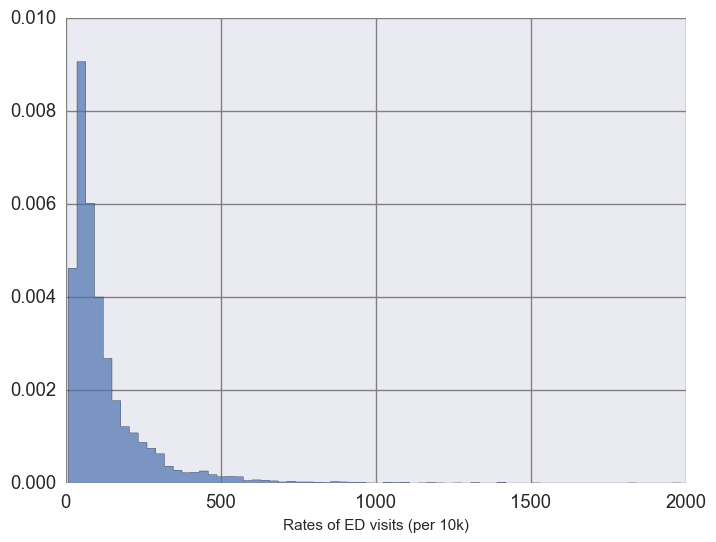

In [110]:
plt.hist(target,bins=70,normed=True,histtype='stepfilled',alpha=0.7)
plt.xlabel('Rates of ED visits (per 10k)')

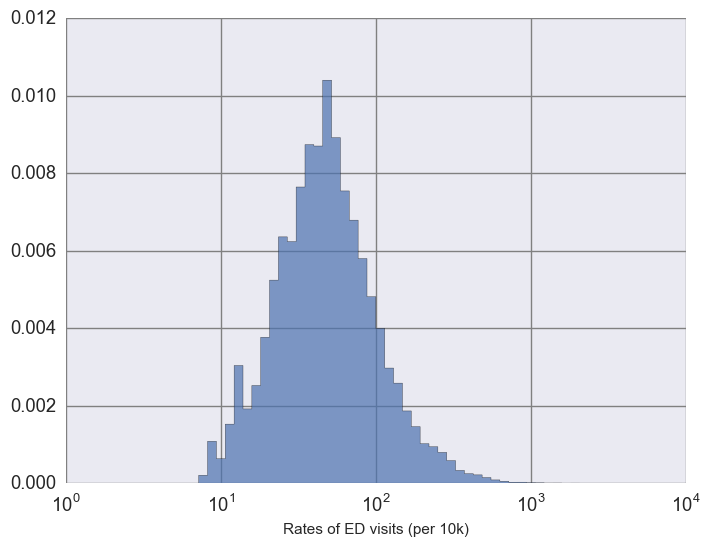

In [126]:
bins=np.logspace(0,4,71)
plt.hist(target,bins=bins,normed=True,histtype='stepfilled',alpha=0.7)
plt.xscale('log')
plt.xlabel('Rates of ED visits (per 10k)')

In [127]:
data_df.head()

,County,Year,Number,Rate (per 10k),Age (<4YO),Gender (M),White,African,Asian,Hispanic,...,Adult smokers (%),Second-hand smoke (%),Adult obese (%),Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Radon Zone,Population near busy roads (%)
0,Alameda,2005,257.0,448.28,1,0,0,1,0,0,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
1,Alameda,2005,420.0,708.98,1,1,0,1,0,0,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
2,Alameda,2005,406.0,221.79,0,0,0,1,0,0,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
3,Alameda,2005,461.0,254.14,0,1,0,1,0,0,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
4,Alameda,2005,61.0,51.37,1,0,0,0,1,0,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7


In [128]:
feats_df= data_df.iloc[:,4:]

In [129]:
feats_df.head()

,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,Good,Moderate,Unhealthy AQI,...,Adult smokers (%),Second-hand smoke (%),Adult obese (%),Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Radon Zone,Population near busy roads (%)
0,1,0,0,1,0,0,0,0.679452,0.282192,0.038356,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
1,1,1,0,1,0,0,0,0.679452,0.282192,0.038356,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
2,0,0,0,1,0,0,0,0.679452,0.282192,0.038356,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
3,0,1,0,1,0,0,0,0.679452,0.282192,0.038356,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
4,1,0,0,0,1,0,0,0.679452,0.282192,0.038356,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7


In [130]:
feats_df.shape

(4803, 35)

4803 data points for 35 features

In [136]:
target_df= data_df.iloc[:,:4]
target_df.drop('Number', axis=1, inplace=True)

In [138]:
feats_df.to_csv('temp_feats.csv',index=False)

target_df.to_csv('temp_target.csv',header=True,index=False)